In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import numpy as np
import hypertools as hyp
import seaborn as sns
from timeit import default_timer as timer
import os
import altair as alt
alt.renderers.enable('notebook')

sns.set(style="darkgrid")
%matplotlib inline

In [9]:
data_path = os.path.abspath('../../../../../data/analysis/')
file = os.path.join(data_path, 'R0_VH_R1aafreq.csv')
df = pd.read_csv(file)



R0_VH_R1aafreq.csv


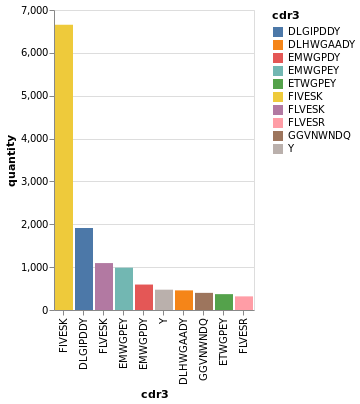

R0_VH_S1_L001_R1_001aafreq.csv


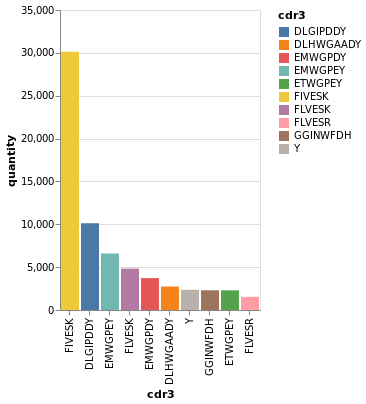

R1a_VH_S2_L001_R1_001aafreq.csv


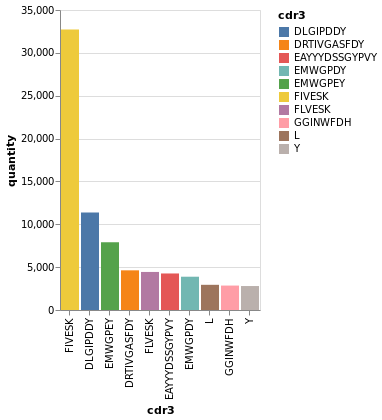

R1b_VH_S3_L001_R1_001aafreq.csv


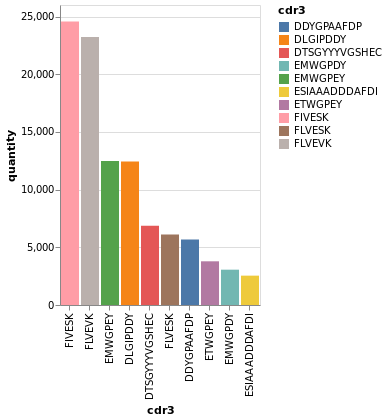

R2a_VH_S4_L001_R1_001aafreq.csv


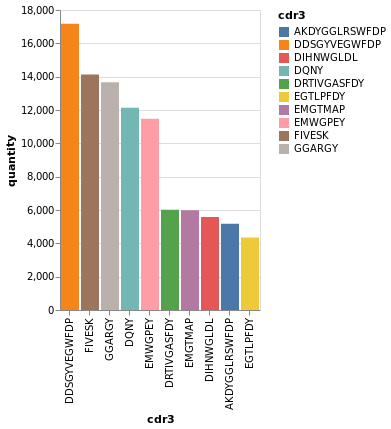

R2b_VH_S5_L001_R1_001aafreq.csv


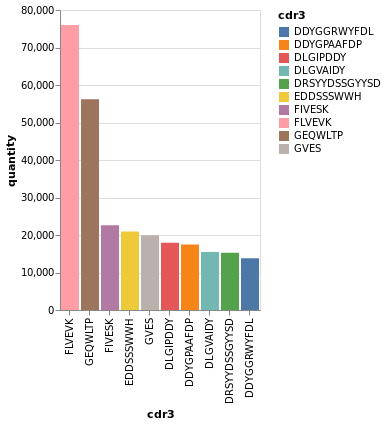

R3a_VH_S6_L001_R1_001aafreq.csv


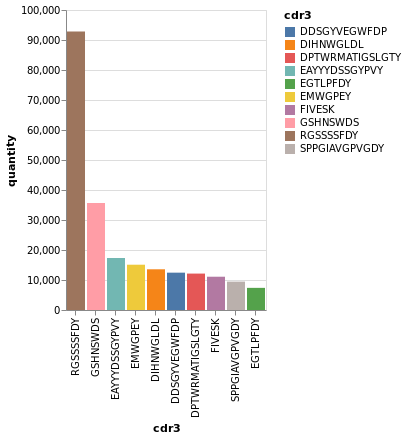

R3b_VH_S7_L001_R1_001aafreq.csv


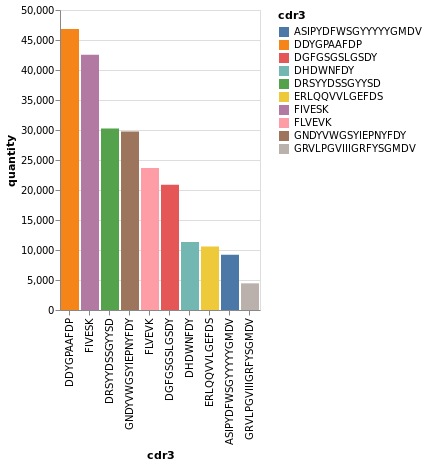

R4a_VH_S8_L001_R1_001aafreq.csv


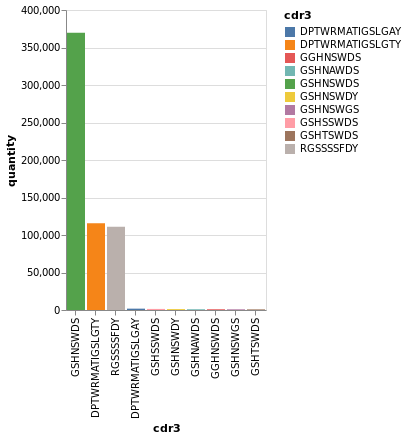

R4b_VH_S9_L001_R1_001aafreq.csv


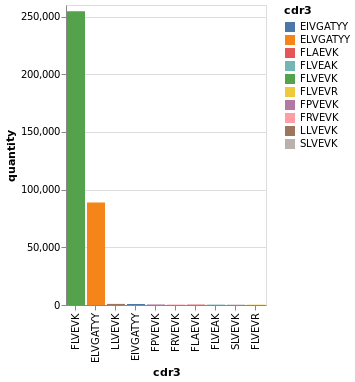

R5b_VH_S10_L001_R1_001aafreq.csv


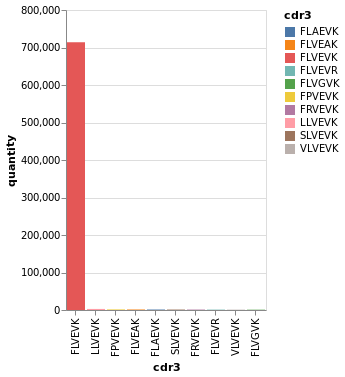

In [10]:
for f in sorted(os.listdir(data_path)):
    if f.endswith('csv') and f.startswith('R') and os.path.getsize(os.path.join(data_path, f)) >= 1000:
        print(f)
        df = pd.read_csv(os.path.join(data_path, f))
        cdr_top_10 = df.sort_values(by='quantity', ascending=False)[:10]
        alt.Chart(cdr_top_10).mark_bar().encode(alt.X('cdr3', sort=alt.EncodingSortField(field="quantity", op="count", order='ascending')), y='quantity', color=alt.Color('cdr3', sort=list(cdr_top_10['cdr3'].sort_values()))).configure(background='white').display();
#         print(os.path.getsize(os.path.join(data_path, f)))

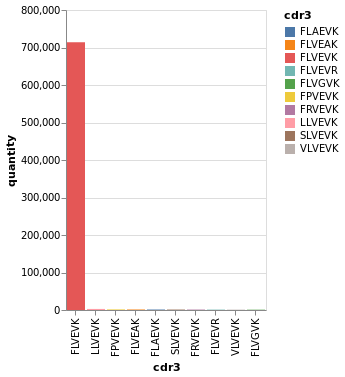

In [11]:
# R0_VH_S1_L001_R1_001aafreq.csv
cdr_top_10 = df.sort_values(by='quantity', ascending=False)[:10]
alt.Chart(cdr_top_10).mark_bar().encode(alt.X('cdr3', sort=alt.EncodingSortField(field="quantity", op="count", order='ascending')), y='quantity', color=alt.Color('cdr3', sort=list(cdr_top_10['cdr3'].sort_values()))).configure(background='white')

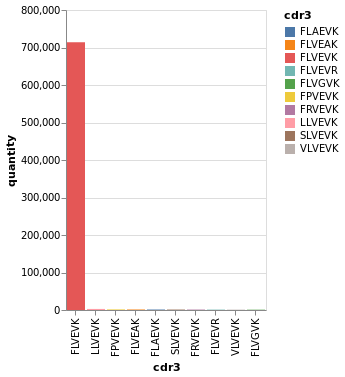

In [12]:
cdr_top_10 = df.sort_values(by='quantity', ascending=False)[:10]
alt.Chart(cdr_top_10).mark_bar().encode(alt.X('cdr3', sort=alt.EncodingSortField(field="quantity", op="count", order='ascending')), y='quantity', color=alt.Color('cdr3', sort=list(cdr_top_10['cdr3'].sort_values()))).configure(background='white')

R0_VH_S1_L001_R1_001aafreq.csv 	 12.949009  Mb


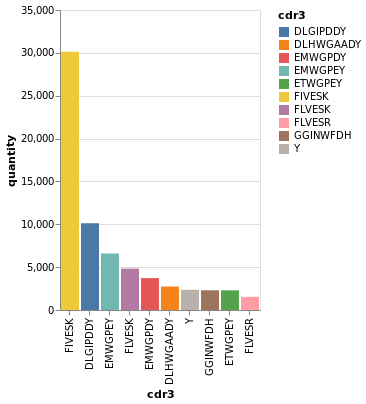

R1a_VH_S2_L001_R1_001aafreq.csv 	 4.31981  Mb


R1b_VH_S3_L001_R1_001aafreq.csv 	 3.915443  Mb


R2a_VH_S4_L001_R1_001aafreq.csv 	 1.769192  Mb


R2b_VH_S5_L001_R1_001aafreq.csv 	 2.101786  Mb


R3a_VH_S6_L001_R1_001aafreq.csv 	 1.111353  Mb


R3b_VH_S7_L001_R1_001aafreq.csv 	 1.005433  Mb


R4a_VH_S8_L001_R1_001aafreq.csv 	 0.993408  Mb


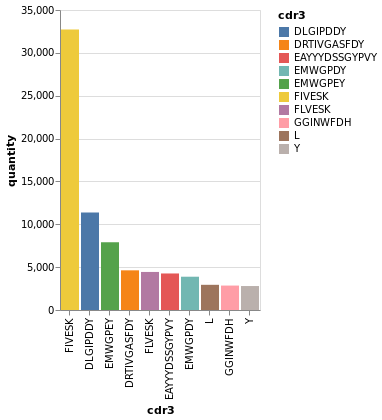

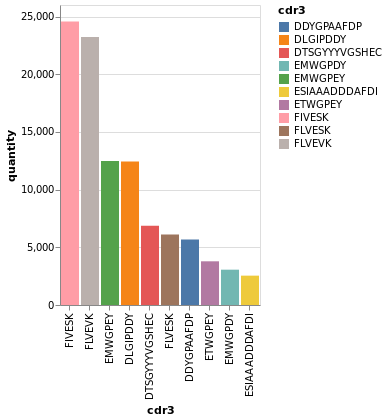

R4b_VH_S9_L001_R1_001aafreq.csv 	 0.171737  Mb


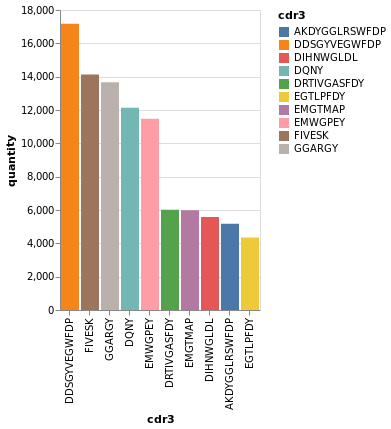

R5b_VH_S10_L001_R1_001aafreq.csv 	 0.225096  Mb


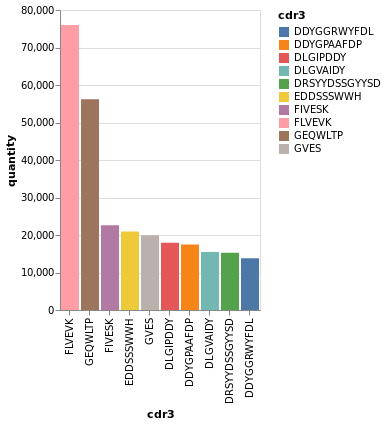

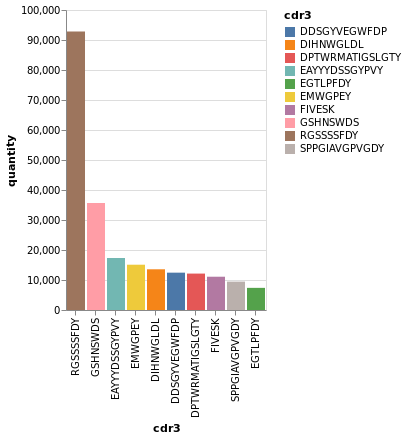

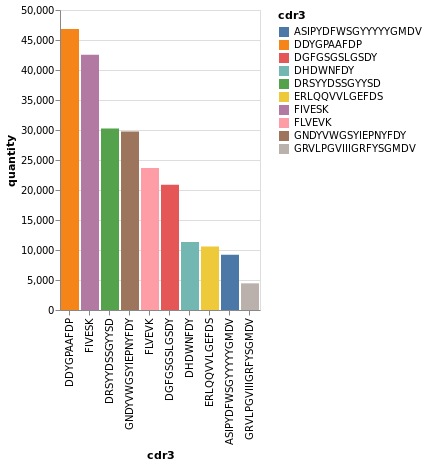

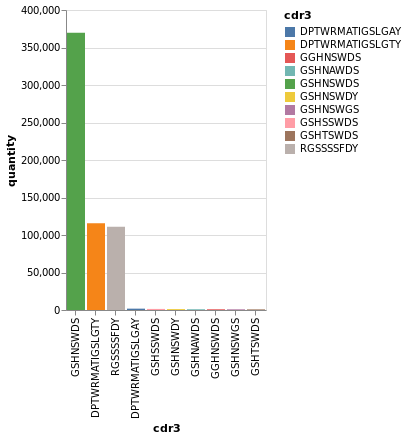

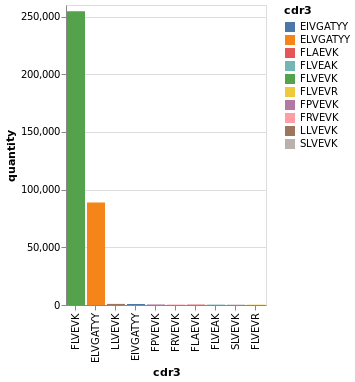

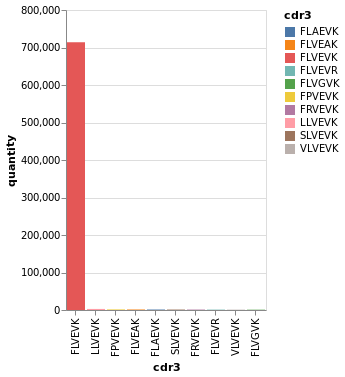

In [47]:
for f in sorted(os.listdir(data_path)):
    if f.endswith('csv') and 'VH' in f and f.startswith('R') and 'S' in f:
        print(f, '\t', str((os.path.getsize(os.path.join(data_path, f))/1000000)), ' Mb')
        df = pd.read_csv(os.path.join(data_path, f))
        cdr_top_10 = df.sort_values(by='quantity', ascending=False)[:10]
        alt.Chart(cdr_top_10).mark_bar().encode(alt.X('cdr3', sort=alt.EncodingSortField(field="quantity", op="count", order='ascending')), y='quantity', color=alt.Color('cdr3', sort=list(cdr_top_10['cdr3'].sort_values()))).configure(background='white').display();
        

In [44]:
data_path

'/home/matheus/mcs/study/code/bioinfo/data/analysis'

In [48]:
for f in sorted(os.listdir(data_path)):
    if f.endswith('txt') and 'VH' in f and f.startswith('R') and 'S' in f:
        print(f, '\t', str((os.path.getsize(os.path.join(data_path, f))/1000000)), ' Mb')

R0_VH_S1_L001_R1_001aafreq.txt 	 110.455665  Mb
R1a_VH_S2_L001_R1_001aafreq.txt 	 85.539123  Mb
R1b_VH_S3_L001_R1_001aafreq.txt 	 82.373923  Mb
R2a_VH_S4_L001_R1_001aafreq.txt 	 59.97811  Mb
R2b_VH_S5_L001_R1_001aafreq.txt 	 140.252669  Mb
R3a_VH_S6_L001_R1_001aafreq.txt 	 60.461955  Mb
R3b_VH_S7_L001_R1_001aafreq.txt 	 59.692256  Mb
R4a_VH_S8_L001_R1_001aafreq.txt 	 132.01507  Mb
R4b_VH_S9_L001_R1_001aafreq.txt 	 69.621839  Mb
R5b_VH_S10_L001_R1_001aafreq.txt 	 146.943502  Mb
